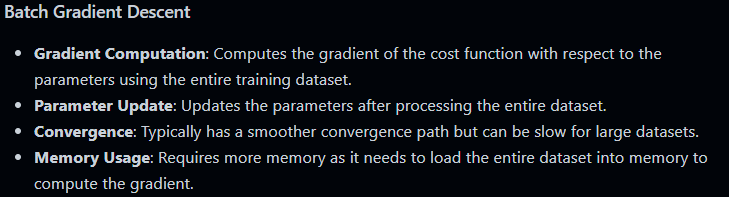

In [1]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
print(X.shape)

(442, 10)


In [4]:
print(y.shape)

(442,)


In [5]:
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [6]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [7]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [8]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [21]:
class BatchGDRegressor:

    def __init__(self,learning_rate,epochs):
        self.coef_= None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self,X_train,y_train):
        # init your coeffecients
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        for i in range(self.epochs):
            y_hat = np.dot(X_train,self.coef_)+self.intercept_
            # print(y_hat.shape)
            intercept_derivative = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ -(self.lr * intercept_derivative)
            coef_derivatives = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_derivatives)
        print(self.intercept_,self.coef_)

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [52]:
gdr = BatchGDRegressor(0.5,1000)

In [53]:
gdr.fit(X_train,y_train)

152.01351687661833 [  14.38990585 -173.7235727   491.54898524  323.91524824  -39.32648042
 -116.01061213 -194.04077415  103.38135565  451.63448787   97.57218278]


In [54]:
y_pred = gdr.predict(X_test)
y_pred

array([152.26392304, 198.96222354, 127.66111541, 104.59596478,
       265.23062371, 252.09467525, 112.76592254, 115.72549839,
        96.37765691, 187.64845451, 144.9482918 , 172.110596  ,
       178.81497695, 136.51444368, 292.15564227,  87.25795061,
       202.18473262, 149.11155912, 132.30895031, 128.70828962,
       148.38757935, 171.81318343, 150.93593445, 174.47559507,
       127.76388814, 221.82234243, 199.96855698, 101.54518353,
        54.85644772, 237.61948938, 244.2801351 , 112.91877003,
        68.12192242,  96.00468527, 204.32975531, 163.99882781,
       160.95172334, 191.90398957, 113.33794145, 238.46002509,
       141.40211434, 120.45598718, 188.12639096, 186.46474321,
       174.98259299, 143.24561624, 168.80798895, 299.18508813,
       105.40854525, 169.51466009, 254.37509674, 142.60026818,
       151.7158263 , 122.70403085, 191.52875115,  94.27792144,
       129.03875584,  75.96073902, 157.91752518, 156.36603694,
       163.20324594, 160.93274887, 102.3002858 , 227.76

In [55]:
r2_score(y_test,y_pred)

0.4534503034722803

### How Computer Scientists Use Batch Gradient Descent
Computer scientists often use batch gradient descent for optimization tasks in machine learning. There are two main approaches:

1. **Inbuilt Libraries**: Libraries like Scikit-learn, TensorFlow, and PyTorch provide optimized implementations of gradient descent algorithms. These are highly efficient and easy to use.

2. **Custom Implementations**: For educational purposes or specific use cases, scientists may write their own implementations, as demonstrated in this notebook with the `BatchGDRegressor` class.